In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
ds = pd.read_csv('Salary.csv')

In [3]:
X = np.array(ds['YearsExperience'])
X = X.reshape(-1, 1)
# X = ds.iloc[:,:-1].values can also be done

In [4]:
y = np.array(ds['Salary'])
#y = ds.iloc[:,-1].values can also be done

In [5]:
# Checking the dataset
ds.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
#checking for missing values
ds.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [7]:
ds.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [8]:
# Splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [9]:
print(X_train.shape)
print(X_test.shape)

(28, 1)
(7, 1)


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

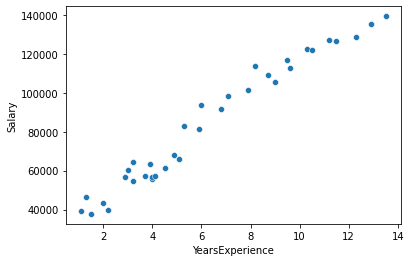

In [10]:
sns.scatterplot(data=ds, y="Salary", x="YearsExperience")
#shows as years increase, salary also increases

In [11]:
#Regression Object
regressor = linear_model.LinearRegression()

In [12]:
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
predicted = regressor.predict(X_test.reshape(-1, 1))

In [14]:
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean square error
print ("Residual sum of squares: %.2f" % np.mean((regressor.predict(X_test.reshape(-1, 1)) - y_test)**2))
# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % regressor.score(X_test.reshape(-1, 1), y_test))

Coefficients: 
 [8755.64617983]
Residual sum of squares: 7085348.45
Variance score: 0.99


In [15]:
# Checking score
r2_score(y_test,regressor.predict(X_test.reshape(-1, 1)))
#Gives 99%

0.9920709643930944

Text(0.5, 1.0, 'visualising test set results')

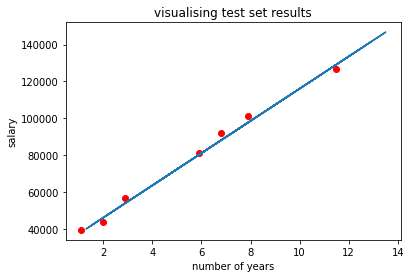

In [16]:
#visualising test set results
plt.scatter(X_test,y_test,c = 'red')
plt.plot(X_train, regressor.predict(X_train))
plt.xlabel('number of years')
plt.ylabel('salary')
plt.title('visualising test set results')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

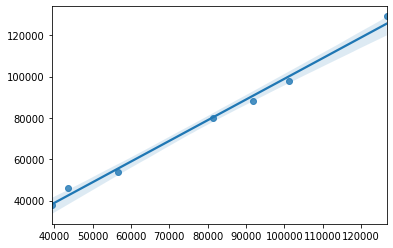

In [17]:
predictions = regressor.predict(X_test)
sns.regplot(y_test,predictions)

In [18]:
y_test_matrix = y_test.reshape(-1,1)
y_test_matrix

array([[126756],
       [101302],
       [ 43525],
       [ 81363],
       [ 91738],
       [ 56642],
       [ 39343]])

In [19]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'actual':y_test_matrix.flatten(),'Predicted':predictions.flatten()}) #flatten toget single axis of data (1 dimension only)

In [20]:
dframe.head(7)
#almost similar

,actual,Predicted
0,126756,129181.732602
1,101302,97661.406354
2,43525,46003.093893
3,81363,80150.113995
4,91738,88030.195557
5,56642,53883.175455
6,39343,38123.012332


Text(0, 0.5, 'salary')

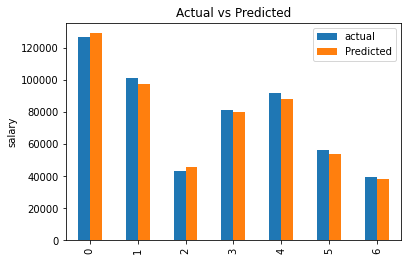

In [21]:
# Final Graph
graph =dframe.head(7)
graph.plot(kind='bar')
plt.title('Actual vs Predicted')
plt.ylabel('salary')